In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
t_data=pd.read_excel("temp.xlsx")

x=(t_data.T1+t_data.T2)/2
ct=np.polyfit(x,t_data.UT,3)
print(x,ct)

0     5.0
1    15.0
2    25.0
3    35.0
4    45.0
5    55.0
6    65.0
7    75.0
8    85.0
9    95.0
dtype: float64 [ 5.86635587e-06 -1.14510490e-03  1.49736791e-01  3.75313782e+01]


In [55]:
def get_UT_k(x):
    return (x**3*ct[0]+x**2*ct[1]+x*ct[2]+ct[3])*1e-3

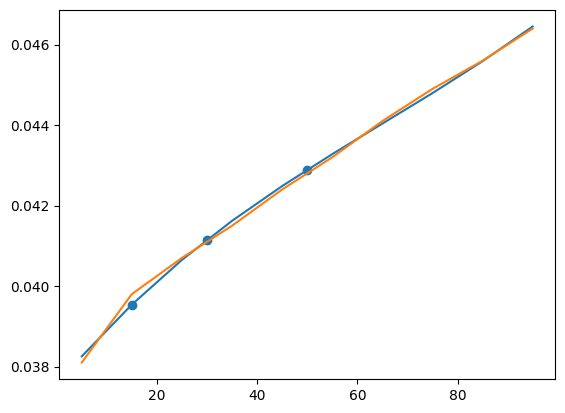

In [56]:
plt.plot(x,get_UT_k(x))
plt.scatter([15,30,50],[get_UT_k(15),get_UT_k(30),get_UT_k(50)])
plt.plot(x,t_data.UT*1e-3)

In [57]:
data=pd.read_excel("data.xlsx")

In [58]:
d1=data[data.Tw==15]
d2=data[data.Tw==30]
d3=data[data.Tw==50]
d1.P-=1
d2.P-=1
d3.P-=1
d1,d2,d3

C:\Users\Daniil\AppData\Local\Temp\ipykernel_13612\2354604476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1.P-=1
C:\Users\Daniil\AppData\Local\Temp\ipykernel_13612\2354604476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2.P-=1
C:\Users\Daniil\AppData\Local\Temp\ipykernel_13612\2354604476.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

(     U0  Tw    P     Ui    rUi
 0  0.03  15  3.0  0.128  0.098
 1  0.03  15  2.5  0.110  0.080
 2  0.03  15  2.0  0.088  0.058
 3  0.03  15  1.5  0.070  0.040
 4  0.03  15  1.0  0.053  0.023,
       U0  Tw    P     Ui    rUi
 5  0.038  30  3.0  0.121  0.083
 6  0.038  30  2.5  0.102  0.064
 7  0.038  30  2.0  0.085  0.047
 8  0.038  30  1.5  0.069  0.031
 9  0.038  30  1.0  0.053  0.015,
        U0  Tw    P     Ui    rUi
 10  0.053  50  3.0  0.110  0.057
 11  0.053  50  2.5  0.096  0.043
 12  0.053  50  2.0  0.081  0.028
 13  0.053  50  1.5  0.069  0.016
 14  0.053  50  1.0  0.055  0.002)

In [59]:
def getkb(X,Y):
    k=(np.average(Y*X)-np.average(Y)*np.average(X))/(np.average(X*X)-np.average(X)**2)
    b=np.average(Y)-k*np.average(X)
    def av(n):
        return np.average(n)
    sigk=np.sqrt(np.abs((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k))/np.sqrt(X.shape[0])
    #print((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k)
    sigb=sigk*np.sqrt(av(X*X)-av(X)**2)
    return np.array([k,b,np.abs(sigk/k),np.abs(sigb/b)])

In [60]:
c1=getkb(d1.P,d1.rUi/(get_UT_k(15)))
c2=getkb(d2.P,d2.rUi/(get_UT_k(30)))
c3=getkb(d3.P,d3.rUi/(get_UT_k(50)))
c1,c2,c3

(array([ 0.9610623 , -0.40971603,  0.01940957,  0.03219359]),
 array([ 0.82135964, -0.47629139,  0.01652573,  0.02015145]),
 array([ 0.63886217, -0.59689312,  0.0142289 ,  0.01076879]))

In [64]:
l=np.linspace(0,3,5)

In [65]:
l

array([0.  , 0.75, 1.5 , 2.25, 3.  ])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


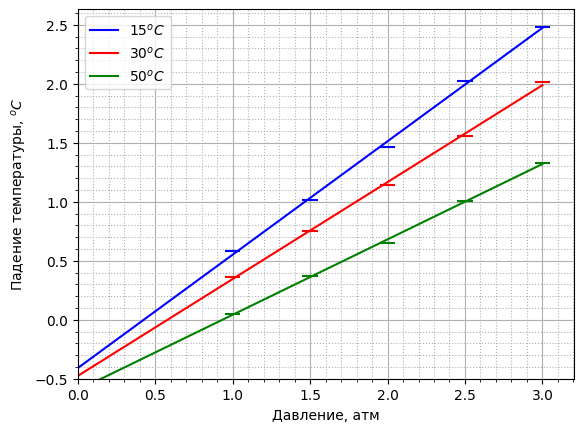

In [66]:
plt.xlabel('Давление, атм')
plt.ylabel(r'Падение температуры, $^oC$')
#plt.plot(l,l*c1[0]+c1[1])
plt.errorbar(d1.P,d1.rUi/get_UT_k(15), xerr=0.05, fmt='.b',markersize=0.1)
plt.plot(l,l*c1[0] +c1[1], 'b', label="15$^oC$")#7.54288043e-01
#plt.plot(l,l*c2[0]+c2[1])
plt.errorbar(d1.P,d2.rUi/get_UT_k(30), xerr=0.05, fmt='.r',markersize=0.1)
plt.plot(l,l*c2[0] +c2[1],'r', label="30$^oC$")#7.10876206e-01
#plt.plot(l,l*c3[0]+c3[1])
plt.errorbar(d1.P,d3.rUi/get_UT_k(50), xerr=0.05, fmt='.g',markersize=0.1)
plt.plot(l,l*c3[0] +c3[1],'g', label="50$^oC$")#6.35785460e-01
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend()
plt.ylim(ymin=plt.gca().get_yticks()[1])
plt.xlim(xmin=plt.gca().get_xticks()[1])
plt.savefig('mus.eps')

In [54]:
print(c1,c2,c3)
mu=np.array([c1[0],c2[0],c3[0]])/100000
T=np.array([15,30,50])+273
T

[ 1.33148419 -0.56763273  0.01940957  0.03219359] [ 1.1210138  -0.65005534  0.01652573  0.02015145] [ 0.85923719 -0.80279095  0.0142289   0.01076879]


array([288, 303, 323])

[9.61062297e-06 8.21359644e-06 6.38862172e-06] [9.63770440e-06 8.16373559e-06 6.41140115e-06]


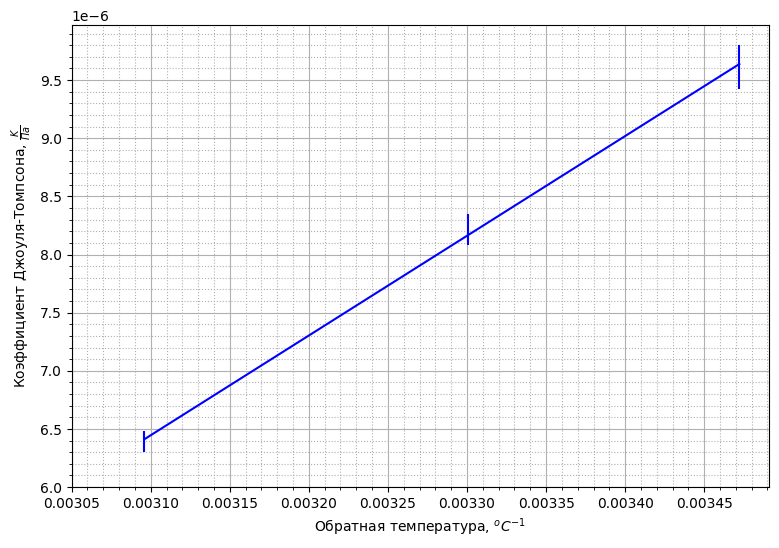

In [20]:
[an,bn,ans,bns]=getkb(1/T,mu)
plt.figure(figsize=(9, 6))
plt.ylabel(r'Коэффициент Джоуля-Томпсона, $\frac{K}{Па}$')
plt.xlabel(r'Обратная температура, $^oC^{-1}$')
plt.errorbar(1/T,mu,yerr=np.array([c1[2],c2[2],c3[2]])*mu, fmt='.b', markersize=0.1)
#an,bn=np.float64(0.0025255270400855257),np.float64(-1.2263106843062918e-06)
plt.plot(1/T,an/T+bn, c='b')
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.ylim(ymin=plt.gca().get_yticks()[0])
plt.xlim(xmin=plt.gca().get_xticks()[0])
plt.savefig('musPT.eps')
print(mu,an/T+bn)

In [21]:
print(ans,bns)

0.015454484646221038 0.001012136318395101


In [22]:
cp=((871+846)/2)*44*1e-3
an,bn,cp

(np.float64(0.008574960951126712), np.float64(-2.013646556859446e-05), 37.774)

In [23]:
8.31*7/2

29.085

In [24]:
a=an*8.31*cp/2
b=-bn*cp
a,b,2*a/(8.31*b),an/bn

(np.float64(1.34584843899146),
 np.float64(0.0007606348503880871),
 np.float64(425.84240625129974),
 np.float64(-425.84240625129974))

In [17]:
2*a/(8.31*b), 2073

(np.float64(425.8424062513023), 2073)

In [18]:
mt=mu*T
mt,mu[0]*T[0]

(array([0.00276786, 0.00248872, 0.00206352]),
 np.float64(0.0027678594167833935))

In [19]:
b=(mt[0]-mt[1])/(T[1]-T[0])
b

np.float64(1.860931294521429e-05)

In [20]:
mt[0]+b*T[0],mt[1]+b*T[1]

(np.float64(0.008127341545005108), np.float64(0.008127341545005108))

In [21]:
b=(mt[1]-mt[2])/(T[2]-T[1])
b 

np.float64(2.125974527455686e-05)

In [22]:
mt[1]+b*T[1],mt[2]+b*T[2]

(np.float64(0.008930422540795908), np.float64(0.008930422540795908))

In [23]:
(mt[0]-mt[2])/(T[2]-T[0])

np.float64(2.0123845704838614e-05)

In [24]:
mt[0]+b*T[0],mt[2]+b*T[2]

(np.float64(0.00889066605585577), np.float64(0.008930422540795908))

In [25]:
(1.1-1.5)/1.1

-0.36363636363636354

In [26]:
(712.455356423078-592.1808335794236)/712.455356423078

0.1688169255228838